In [ ]:
# Plot graphs inline
%matplotlib inline

In [17]:
import os
path = os.getcwd()
if path == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    os.chdir('gdrive/My Drive/Level-4-Project/')
    
elif path == 'D:\\Google Drive\\Level-4-Project\\notebooks':
    BASE_PATH = "D:/Google Drive/Level-4-Project/"
    
elif path == "/export/home/2192793m":
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"

RESULTS_PATH = BASE_PATH + 'results/final_evaluation_comparison/'
if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [19]:
SAVE_GRAPHS = False

Original Results

In [20]:
CNN_RESULTS_PATH = BASE_PATH + 'results/CNN_final_model_evaluation/'
# ------------ CNN with tuned params -------------------------
with open(CNN_RESULTS_PATH + "results_test_c.pkl", 'rb') as results_file:
    cnn_c = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_test_20.pkl", 'rb') as results_file:
    cnn_20 = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_6_fold.pkl", 'rb') as results_file:
    cnn_6_fold = pickle.load(results_file)

# ------------ CNN with base params -------------------------
with open(CNN_RESULTS_PATH + "results_test_c_base.pkl", 'rb') as results_file:
    cnn_base_c = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_test_20_base.pkl", 'rb') as results_file:
    cnn_base_20 = pickle.load(results_file)

with open(CNN_RESULTS_PATH + "results_6_fold_base.pkl", 'rb') as results_file:
    cnn_base_6_fold = pickle.load(results_file)
    
# ------------ Range with tuned params -------------------------
RANGE_RESULTS_PATH = BASE_PATH + 'results/range_data_model_final_evaluation/'

with open(RANGE_RESULTS_PATH + "results_c.pkl", 'rb') as results_file:
    range_c = pickle.load(results_file)
    
with open(RANGE_RESULTS_PATH + "results_20.pkl", 'rb') as results_file:
    range_20 = pickle.load(results_file)
    
with open(RANGE_RESULTS_PATH + "results_6_fold.pkl", 'rb') as results_file:
    range_6_fold = pickle.load(results_file)

Results for corrupt data removed

In [21]:
CNN_RESULTS_PATH = BASE_PATH + 'results/CNN_final_model_evaluation_without_corrupt/'
# ------------ CNN with tuned params -------------------------
with open(CNN_RESULTS_PATH + "results_test_c.pkl", 'rb') as results_file:
    cnn_c_2 = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_test_20.pkl", 'rb') as results_file:
    cnn_20_2 = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_6_fold.pkl", 'rb') as results_file:
    cnn_6_fold_2 = pickle.load(results_file)

# ------------ CNN with base params -------------------------
with open(CNN_RESULTS_PATH + "results_test_c_base.pkl", 'rb') as results_file:
    cnn_base_c_2 = pickle.load(results_file)
    
with open(CNN_RESULTS_PATH + "results_test_20_base.pkl", 'rb') as results_file:
    cnn_base_20_2 = pickle.load(results_file)

with open(CNN_RESULTS_PATH + "results_6_fold_base.pkl", 'rb') as results_file:
    cnn_base_6_fold_2 = pickle.load(results_file)
    
# ------------ Range with tuned params -------------------------
RANGE_RESULTS_PATH = BASE_PATH + 'results/range_data_model_final_evaluation_without_corrupt/'

with open(RANGE_RESULTS_PATH + "results_c.pkl", 'rb') as results_file:
    range_c_2 = pickle.load(results_file)
    
with open(RANGE_RESULTS_PATH + "results_20.pkl", 'rb') as results_file:
    range_20_2 = pickle.load(results_file)
    
with open(RANGE_RESULTS_PATH + "results_6_fold.pkl", 'rb') as results_file:
    range_6_fold_2 = pickle.load(results_file)

In [22]:
target_names = ["walking", "pushing", "sitting", "pulling", "circling", "clapping", "bending"]
nb_classes = len(target_names)

# C Evaluation

In [87]:
def plot_confusion_matrix(cm, classes, title="Confusion Matrix", normalized=True, save=False, path='/'):
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    if save:
        plt.savefig(path, format='pdf')
    plt.show()

In [88]:
round_to = 2
print("------ Original ------")
print("Base CNN Accuracy:", round(cnn_base_c["accuracy"]*100, round_to))
print("Tuned CNN Accuracy:", round(cnn_c["accuracy"]*100, round_to))
print("Range Model Accuracy:", round(range_c["accuracy"]*100, round_to))
print("\n------ Corrupt data removed ------")
print("Base CNN Accuracy:", round(cnn_base_c_2["accuracy"]*100, round_to))
print("Tuned CNN Accuracy:", round(cnn_c_2["accuracy"]*100, round_to))
print("Range Model Accuracy:", round(range_c_2["accuracy"]*100, round_to))

------ Original ------
Base CNN Accuracy: 77.27
Tuned CNN Accuracy: 77.33
Range Model Accuracy: 69.98

------ Corrupt data removed ------
Base CNN Accuracy: 78.31
Tuned CNN Accuracy: 69.93
Range Model Accuracy: 74.32


Original

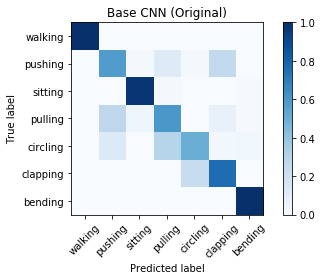

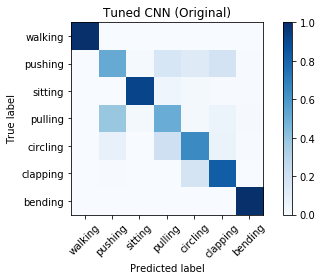

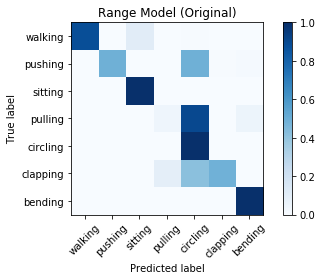

In [93]:
plot_confusion_matrix(cnn_base_c["confusion_matrix"], target_names, title="Base CNN (Original)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_base.pdf")

plot_confusion_matrix(cnn_c["confusion_matrix"], target_names, title="Tuned CNN (Original)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_tuned.pdf")

plot_confusion_matrix(range_c["confusion_matrix"], target_names, title="Range Model (Original)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_range.pdf")

Corrupt data removed

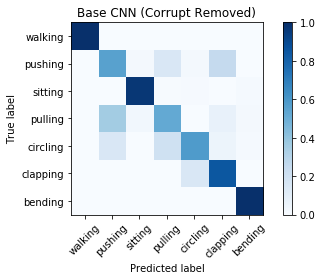

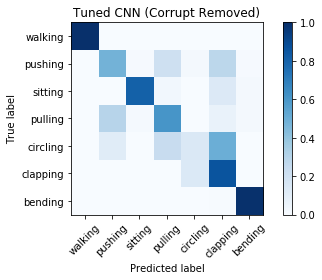

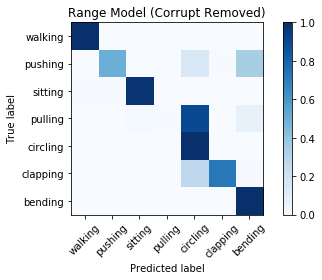

In [94]:
plot_confusion_matrix(cnn_base_c_2["confusion_matrix"], target_names, title="Base CNN (Corrupt Removed)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_base_corrupt_removed.pdf")

plot_confusion_matrix(cnn_c_2["confusion_matrix"], target_names, title="Tuned CNN (Corrupt Removed)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_tuned_corrupt_removed.pdf")

plot_confusion_matrix(range_c_2["confusion_matrix"], target_names, title="Range Model (Corrupt Removed)",
                      save=SAVE_GRAPHS, path=RESULTS_PATH + "confusion_matrix_range_corrupt_removed.pdf")

# 20% of Data, Five-Fold Cross-Validation

In [9]:
round_to = 2
print("------ Original ------")
print("Base CNN Average Accuracy:", round(cnn_base_20["average_accuracy"]*100, round_to))
print("Tuned CNN Average Accuracy:", round(cnn_20["average_accuracy"]*100, round_to))
print("Range Model Average Accuracy:", round(range_20["average_accuracy"]*100, round_to))
print("\n------ Corrupt data removed ------")
print("Base CNN Average Accuracy:", round(cnn_base_20_2["average_accuracy"]*100, round_to))
print("Tuned CNN Average Accuracy:", round(cnn_20_2["average_accuracy"]*100, round_to))
print("Range Model Average Accuracy:", round(range_20_2["average_accuracy"]*100, round_to))

------ Original ------
Base CNN Average Accuracy: 95.22
Tuned CNN Average Accuracy: 93.85
Range Model Average Accuracy: 96.33

------ Corrupt data removed ------
Base CNN Average Accuracy: 97.11
Tuned CNN Average Accuracy: 94.96
Range Model Average Accuracy: 97.94


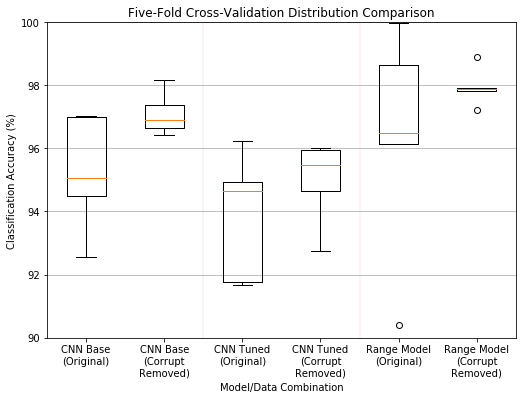

In [30]:
acc_cnn = []
acc_cnn_base = []
acc_range = []
acc_cnn_2 = []
acc_cnn_base_2 = []
acc_range_2 = []

for fold in range(5):
    acc_cnn_base.append(cnn_base_20[str(fold)]["accuracy"]*100)
    acc_cnn.append(cnn_20[str(fold)]["accuracy"]*100)
    acc_range.append(range_20[str(fold)]["accuracy"]*100)
    acc_cnn_base_2.append(cnn_base_20_2[str(fold)]["accuracy"]*100)
    acc_cnn_2.append(cnn_20_2[str(fold)]["accuracy"]*100)
    acc_range_2.append(range_20_2[str(fold)]["accuracy"]*100)
    
results = [acc_cnn_base, acc_cnn_base_2, acc_cnn, acc_cnn_2, acc_range, acc_range_2]
labels = ["CNN Base\n(Original)",
          "CNN Base\n(Corrupt\nRemoved)",
          "CNN Tuned\n(Original)", 
          "CNN Tuned\n(Corrupt\nRemoved)",
          "Range Model\n(Original)", "Range Model\n(Corrupt\nRemoved)"]

plt.figure(figsize=(8.4, 5.8))
plt.boxplot(results,
            labels=labels,
            zorder=3)
plt.title("Five-Fold Cross-Validation Distribution Comparison")
plt.xlabel("Model/Data Combination")
plt.ylabel("Classification Accuracy (%)")
plt.axvline(2.5, linewidth=0.1, color='r')
plt.axvline(4.5, linewidth=0.1, color='r')
plt.ylim(90,100)

plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
     plt.savefig(RESULTS_PATH + "boxplot_20_all.pdf", format='pdf')

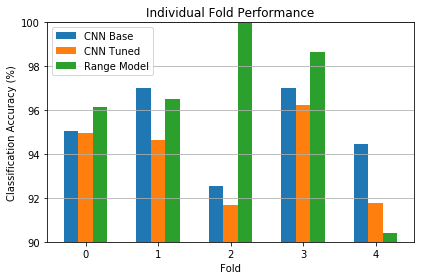

In [69]:
width = 0.2
plt.bar(np.array(range(5))-width, acc_cnn_base, width, label="CNN Base")
plt.bar(np.array(range(5)), acc_cnn, width, label="CNN Tuned")
plt.bar(np.array(range(5))+width, acc_range, width, label="Range Model")

plt.ylim((90, 100))
plt.xlabel("Fold")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Fold Performance")
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
if True:
    plt.savefig(RESULTS_PATH + "bar_5_fold.pdf", format='pdf')

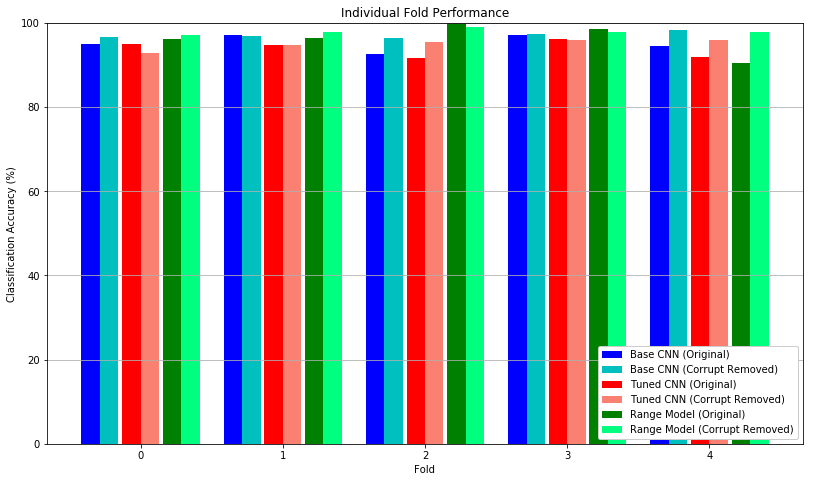

In [129]:
width = 0.13
plt.figure(figsize=(11.4, 6.8))

# plt.figure(figsize=(20,8))
plt.bar(np.array(range(5))-2.7*width, acc_cnn_base, width, label="Base CNN (Original)", color='b')
plt.bar(np.array(range(5))-1.7*width, acc_cnn_base_2, width, label="Base CNN (Corrupt Removed)", color='c')

plt.bar(np.array(range(5))-width/2, acc_cnn, width, label="Tuned CNN (Original)", color='r')
plt.bar(np.array(range(5))+width/2, acc_cnn_2, width, label="Tuned CNN (Corrupt Removed)", color='salmon')

plt.bar(np.array(range(5))+1.7*width, acc_range, width, label="Range Model (Original)", color='g')
plt.bar(np.array(range(5))+2.7*width, acc_range_2, width, label="Range Model (Corrupt Removed)", color='springgreen')


plt.ylim((0, 100))
plt.xlabel("Fold")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Fold Performance")
plt.grid(axis='y')
plt.legend(loc=4, framealpha=1)

plt.tight_layout()
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "bar_5_fold_all.pdf", format='pdf')

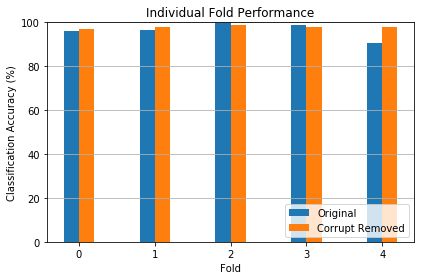

In [48]:
width = 0.2
plt.bar(np.array(range(5))-width/2, acc_range, width, label="Original")
plt.bar(np.array(range(5))+width/2, acc_range_2, width, label="Corrupt Removed")
# plt.bar(np.array(range(5))+width, acc_range, width, label="Range Model")

plt.ylim((0, 100))
plt.xlabel("Fold")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Fold Performance")
plt.grid(axis='y')
plt.legend(loc=4)

plt.tight_layout()
if False:
    plt.savefig(RESULTS_PATH + "bar_5_fold.pdf", format='pdf')

# Six-Fold Subject Validation

In [10]:
round_to = 2
print("------ Original ------")
print("Base CNN Average Accuracy:", round(cnn_base_6_fold["avg_acc"]*100, round_to))
print("Tuned CNN Average Accuracy:", round(cnn_6_fold["avg_acc"]*100, round_to))
print("Range Model Average Accuracy:", round(range_6_fold["avg_acc"]*100, round_to))
print("\n------ Corrupt data removed ------")
print("Base CNN Average Accuracy:", round(cnn_base_6_fold_2["avg_acc"]*100, round_to))
print("Tuned CNN Average Accuracy:", round(cnn_6_fold_2["avg_acc"]*100, round_to))
print("Range Model Average Accuracy:", round(range_6_fold_2["avg_acc"]*100, round_to))


------ Original ------
Base CNN Average Accuracy: 77.0
Tuned CNN Average Accuracy: 76.8
Range Model Average Accuracy: 56.2

------ Corrupt data removed ------
Base CNN Average Accuracy: 78.48
Tuned CNN Average Accuracy: 79.39
Range Model Average Accuracy: 56.23


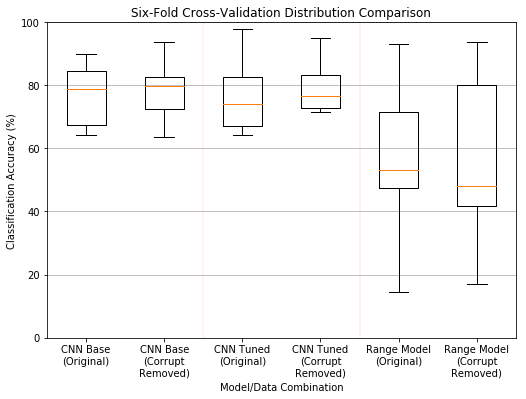

In [31]:
# original
acc_cnn = []
acc_cnn_base = []
acc_range = []
# corrupt removed
acc_cnn_2 = []
acc_cnn_base_2 = []
acc_range_2 = []
subjects = ["A", "B", "C", "D", "E", "F"]
for subject in subjects:
    acc_cnn_base.append(cnn_base_6_fold[subject]["accuracy"]*100)
    acc_cnn.append(cnn_6_fold[subject]["accuracy"]*100)
    acc_range.append(range_6_fold[subject]["accuracy"]*100)
    
    acc_cnn_base_2.append(cnn_base_6_fold_2[subject]["accuracy"]*100)
    acc_cnn_2.append(cnn_6_fold_2[subject]["accuracy"]*100)
    acc_range_2.append(range_6_fold_2[subject]["accuracy"]*100)
    
results = [acc_cnn_base, acc_cnn_base_2, acc_cnn, acc_cnn_2, acc_range, acc_range_2]
labels = ["CNN Base\n(Original)",
          "CNN Base\n(Corrupt\nRemoved)",
          "CNN Tuned\n(Original)", 
          "CNN Tuned\n(Corrupt\nRemoved)",
          "Range Model\n(Original)", "Range Model\n(Corrupt\nRemoved)"]

plt.figure(figsize=(8.4, 5.8))
plt.boxplot(results,
            labels=labels,
            zorder=3)

# plt.boxplot([acc_cnn_base, acc_cnn, acc_range],
#             labels=["CNN Base", "CNN Tuned", "Range Model"],
#             zorder=3)
plt.axvline(2.5, linewidth=0.1, color='r')
plt.axvline(4.5, linewidth=0.1, color='r')
plt.title("Six-Fold Cross-Validation Distribution Comparison")
plt.xlabel("Model/Data Combination")
plt.ylabel("Classification Accuracy (%)")
plt.ylim(0,100)
plt.grid(axis='y', zorder=0)
if SAVE_GRAPHS:
     plt.savefig(RESULTS_PATH + "boxplot_6_fold_all.pdf", format='pdf')

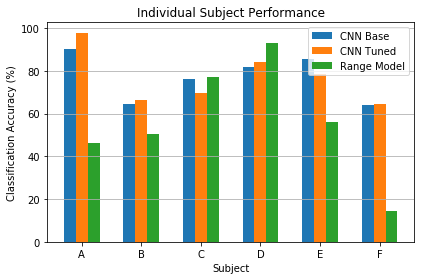

In [51]:
# width = np.min(np.diff(range(len(base["topic_numbers"]))))/6
width = 0.2
# plt.figure(figsize=(20,8))
plt.bar(np.array(range(len(subjects)))-width, acc_cnn_base, width, label="CNN Base")
plt.bar(np.array(range(len(subjects))), acc_cnn, width, label="CNN Tuned")
plt.bar(np.array(range(len(subjects)))+width, acc_range, width, label="Range Model")

plt.xticks(range(len(subjects)), subjects)

plt.xlabel("Subject")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Subject Performance")
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
if True:
    plt.savefig(RESULTS_PATH + "bar_6_fold.pdf", format='pdf')

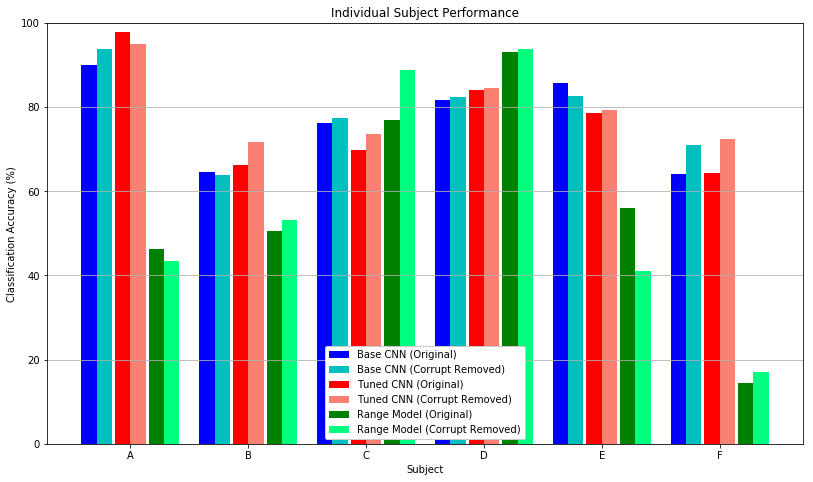

In [33]:
width = 0.13
plt.figure(figsize=(11.4, 6.8))

# plt.figure(figsize=(20,8))
plt.bar(np.array(range(len(subjects)))-2.7*width, acc_cnn_base, width, label="Base CNN (Original)", color='b')
plt.bar(np.array(range(len(subjects)))-1.7*width, acc_cnn_base_2, width, label="Base CNN (Corrupt Removed)", color='c')

plt.bar(np.array(range(len(subjects)))-width/2, acc_cnn, width, label="Tuned CNN (Original)", color='r')
plt.bar(np.array(range(len(subjects)))+width/2, acc_cnn_2, width, label="Tuned CNN (Corrupt Removed)", color='salmon')

plt.bar(np.array(range(len(subjects)))+1.7*width, acc_range, width, label="Range Model (Original)", color='g')
plt.bar(np.array(range(len(subjects)))+2.7*width, acc_range_2, width, label="Range Model (Corrupt Removed)", color='springgreen')


plt.xticks(range(len(subjects)), subjects)
plt.ylim(0,100)
plt.xlabel("Subject")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Subject Performance")
plt.grid(axis='y')
plt.legend(loc=8, framealpha=1)

plt.tight_layout()
if SAVE_GRAPHS:
    plt.savefig(RESULTS_PATH + "bar_6_fold_all.pdf", format='pdf')

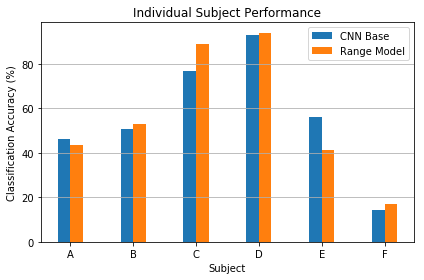

In [51]:
width = 0.2
plt.bar(np.array(range(len(subjects)))-width/2, acc_range, width, label="CNN Base")
plt.bar(np.array(range(len(subjects)))+width/2, acc_range_2, width, label="Range Model")

plt.xticks(range(len(subjects)), subjects)

plt.xlabel("Subject")
plt.ylabel("Classification Accuracy (%)")
plt.title("Individual Subject Performance")
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
if False:
    plt.savefig(RESULTS_PATH + "bar_6_fold.pdf", format='pdf')

In [9]:
acc_range[5]

14.420180722891565

In [16]:
acc_range_2[2]

88.90562248995984